# Table - Countries in the world by population (2022)

##  Introduction

                   This table includes countries and their populations upto 2020. Information of changing population yearly and net change in population and migration of people. Also includes contries land area in the world, fertility rate, median age. People live in urban area and countries population's world share.

## Variables used in this table are:   

| |  Variables  | Type    |
|---:|:-------------|:-----------|
| 1 | Country  | Country       | 
| 2 | Population_2020  | Population of each country   | 
| 3 | Yearly Change  | Yearly changing Population    | 
| 4 | Net Change  | Net changing Population   | 
| 5 | Density (P/Km²)  | Population per km   | 
| 6 | Land Area (Km²)  | Land occupied by country    | 
| 7 | Migrants (net)  | Migration of population    |
| 8 | Fert. Rate  | Fertility rate   |
| 9 | Med. Age  | Average age of population    |  
| 10 | Urban Pop %  | Population living in urban area    |       
| 11 | World Share  | Country Population share at world level   |     


## Basic Exploration

In [1]:
# importing libraries 
import numpy as np   # library for numerical calculation
import pandas as pd   # for analysis and creating dataframe of table
import matplotlib.pyplot as plt    # for visualisation
import seaborn as sns    # for visualisation
import missingno as msno   # for showing missing values 

In [2]:
populn = pd.read_csv('world_population_by_country.csv', delimiter ="|")  # read csv file

In [3]:
populn.head() # show 1st five rows

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,"1,439,323,776",0.39 %,"5,540,090",153,"9,388,211","-348,399",1.7,38,61 %,18.47 %
1,2,India,"1,380,004,385",0.99 %,"13,586,631",464,"2,973,190","-532,687",2.2,28,35 %,17.70 %
2,3,United States,"331,002,651",0.59 %,"1,937,734",36,"9,147,420","954,806",1.8,38,83 %,4.25 %
3,4,Indonesia,"273,523,615",1.07 %,"2,898,047",151,"1,811,570","-98,955",2.3,30,56 %,3.51 %
4,5,Pakistan,"220,892,340",2.00 %,"4,327,022",287,"770,880","-233,379",3.6,23,35 %,2.83 %


## Number of rows and columns in the table

In [4]:
populn.shape # give number of rows and columns

(235, 12)

rows = 235
columns = 11

## Rename columns

In [5]:
populn.rename(columns = {'#':'Index','Country (or dependency)':'Country','Population (2020)':'Population_2020','Yearly Change':'Yearly_Change','Net Change':'Net_Change','Density (P/Km²)':'Density','Land Area (Km²)':'Land_Area','Migrants (net)':'Migrants','Fert. Rate':'Fert_Rate','Med. Age':'Med_Age','Urban Pop %':'Urban_Popln','World Share':'World_Share'},inplace = True)

In [6]:
populn.info()   # get information of all variables 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Index            235 non-null    int64 
 1   Country          235 non-null    object
 2   Population_2020  235 non-null    object
 3   Yearly_Change    235 non-null    object
 4   Net_Change       235 non-null    object
 5   Density          235 non-null    object
 6   Land_Area        235 non-null    object
 7   Migrants         235 non-null    object
 8   Fert_Rate        235 non-null    object
 9   Med_Age          235 non-null    object
 10  Urban_Popln      235 non-null    object
 11  World_Share      235 non-null    object
dtypes: int64(1), object(11)
memory usage: 22.2+ KB


From above table  , varibles which are numeric but showing object, so change columns to numeric

## Change (variables) columns to Numeric

In [7]:
populn['Population_2020']=populn['Population_2020'].str.replace(',','') # remove ',' using replace function

In [8]:
populn['Population_2020'] = pd.to_numeric(populn['Population_2020'], errors = 'coerce')  # change datatype to numeric

In [9]:
populn['Land_Area']=populn['Land_Area'].str.replace(',','')  # remove ',' using replace function

In [10]:
populn['Land_Area'] = pd.to_numeric(populn['Land_Area'], errors = 'coerce')   # change datatype to numeric

In [11]:
populn['Migrants']=populn['Migrants'].str.replace(',','') # remove ',' using replace function

In [12]:
populn['Migrants'] = pd.to_numeric(populn['Migrants'], errors = 'coerce').astype(pd.Int64Dtype())  # change datatype to numeric

In [13]:
populn['Net_Change']=populn['Net_Change'].str.replace(',','')  # remove ',' using replace function

In [14]:
populn['Net_Change'] = pd.to_numeric(populn['Net_Change'], errors = 'coerce')  # change datatype to numeric

In [15]:
populn['Med_Age'] = pd.to_numeric(populn['Med_Age'], errors = 'coerce').astype(pd.Int64Dtype()) # change datatype to numeric

In [16]:
populn['Fert_Rate'] = pd.to_numeric(populn['Fert_Rate'], errors = 'coerce')  # change datatype to numeric

In [17]:
populn['Density']=populn['Density'].str.replace(',','') # remove ',' using replace function

In [18]:
populn['Density'] = pd.to_numeric(populn['Density'], errors = 'coerce') # change datatype to numeric

In [19]:
populn['Yearly_Change'] = populn['Yearly_Change'].str[:-1]  # remove % sign from column

In [20]:
populn['Yearly_Change'] = populn['Yearly_Change'].astype(float)  # change datatype to numeric

In [21]:
populn['Urban_Popln'] = populn['Urban_Popln'].str[:-1]  # remove % sign from column

In [22]:
populn['Urban_Popln'] = pd.to_numeric(populn['Urban_Popln'], errors = 'coerce').astype(pd.Int64Dtype()) #change datatype to numeric

In [23]:
populn['World_Share'] =  populn['World_Share'].str[:-1].astype(float)  # remove % sign from column 'World_Share'

In [24]:
populn.info()   # get information of all variables  after changing to numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Index            235 non-null    int64  
 1   Country          235 non-null    object 
 2   Population_2020  235 non-null    int64  
 3   Yearly_Change    235 non-null    float64
 4   Net_Change       235 non-null    int64  
 5   Density          235 non-null    int64  
 6   Land_Area        235 non-null    int64  
 7   Migrants         201 non-null    Int64  
 8   Fert_Rate        201 non-null    float64
 9   Med_Age          201 non-null    Int64  
 10  Urban_Popln      222 non-null    Int64  
 11  World_Share      235 non-null    float64
dtypes: Int64(3), float64(3), int64(5), object(1)
memory usage: 22.8+ KB


All varibles changed to numeric except Country

##  Missing values in the table

In [25]:
populn_missing = populn.isnull() #  get missing values

In [26]:
populn_missing.sum()

Index               0
Country             0
Population_2020     0
Yearly_Change       0
Net_Change          0
Density             0
Land_Area           0
Migrants           34
Fert_Rate          34
Med_Age            34
Urban_Popln        13
World_Share         0
dtype: int64

Missing values in columns Migrants, Fert_Rate, Med_Age and urban population

<AxesSubplot:>

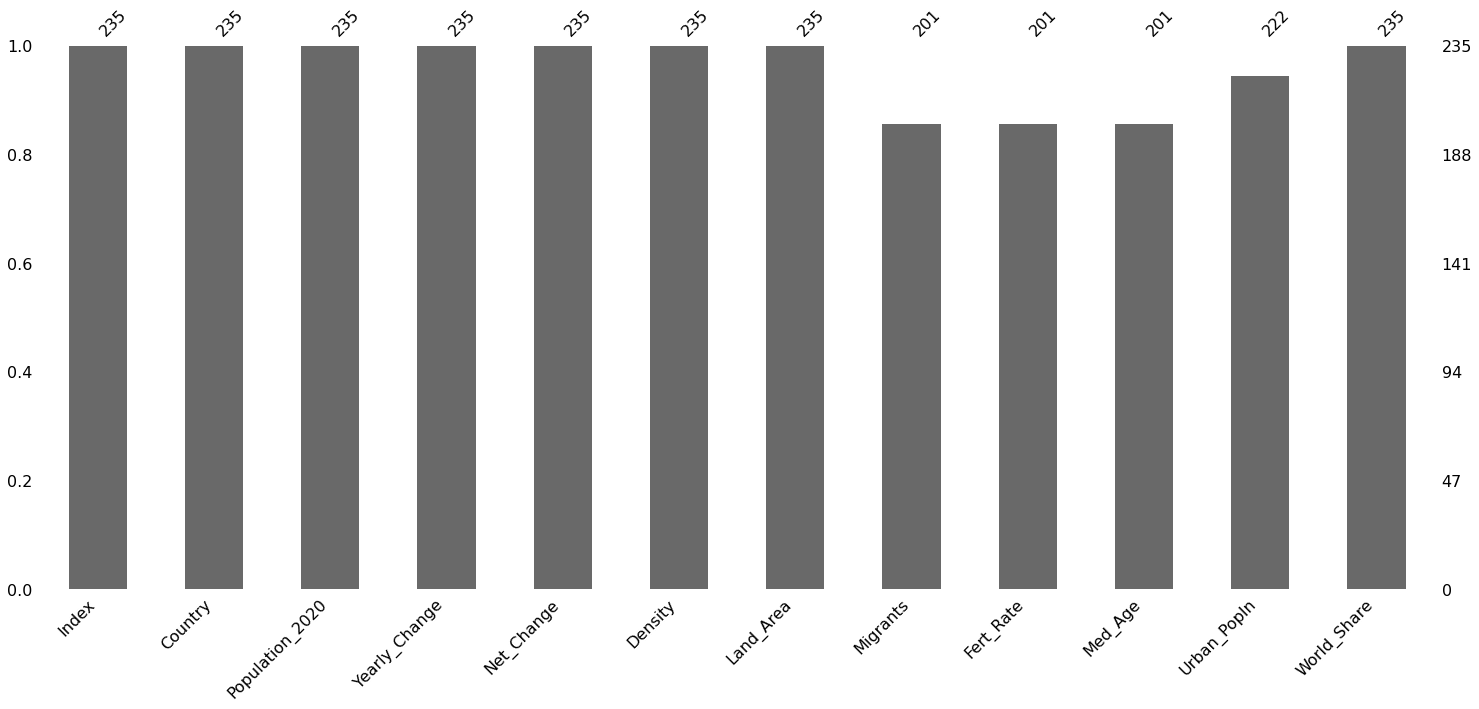

In [27]:
msno.bar(populn)  # showing missing values in the form of bar plot

In [28]:
populn.head() # after converting to numeric  get 1st five rows

,Index,Country,Population_2020,Yearly_Change,Net_Change,Density,Land_Area,Migrants,Fert_Rate,Med_Age,Urban_Popln,World_Share
0,1,China,1439323776,0.39,5540090,153,9388211,-348399,1.7,38,61,18.47
1,2,India,1380004385,0.99,13586631,464,2973190,-532687,2.2,28,35,17.70
2,3,United States,331002651,0.59,1937734,36,9147420,954806,1.8,38,83,4.25
3,4,Indonesia,273523615,1.07,2898047,151,1811570,-98955,2.3,30,56,3.51
4,5,Pakistan,220892340,2.00,4327022,287,770880,-233379,3.6,23,35,2.83


In [29]:
populn.tail()  # after converting to numeric  get last five rows

,Index,Country,Population_2020,Yearly_Change,Net_Change,Density,Land_Area,Migrants,Fert_Rate,Med_Age,Urban_Popln,World_Share
230,231,Montserrat,4992,0.06,3,50,100,<NA>,NaN,<NA>,10,0.0
231,232,Falkland Islands,3480,3.05,103,0,12170,<NA>,NaN,<NA>,66,0.0
232,233,Niue,1626,0.68,11,6,260,<NA>,NaN,<NA>,46,0.0
233,234,Tokelau,1357,1.27,17,136,10,<NA>,NaN,<NA>,0,0.0
234,235,Holy See,801,0.25,2,2003,0,<NA>,NaN,<NA>,<NA>,0.0


## The top three countries based on the density column

In [30]:
populn.nlargest(3, 'Density')[['Country', 'Density']]  # use of nlargest function to get to 3 countries based on density

,Country,Density
213,Monaco,26337
166,Macao,21645
113,Singapore,8358


Top countries based on density column - Monaco, Macao, Singapore	

## Country with the highest fertility rate

In [31]:
populn.iloc[np.where(populn['Fert_Rate'] == max(populn["Fert_Rate"]))][['Country','Fert_Rate']] # use of max function

,Country,Fert_Rate
55,Niger,7.0


Highest fertility rate - Country - Niger

## Country has the lowest fertility rate

In [32]:
populn.iloc[np.where(populn['Fert_Rate'] == min(populn["Fert_Rate"]))][['Country','Fert_Rate']] # use of min function

,Country,Fert_Rate
27,South Korea,1.1


Lowest fertility rate - Country - South Korea

## Sorting the population column based on lowest populated countries

In [33]:
populn.sort_values(by = 'Population_2020')[['Country', 'Population_2020']] # use of sort values

,Country,Population_2020
234,Holy See,801
233,Tokelau,1357
232,Niue,1626
231,Falkland Islands,3480
230,Montserrat,4992
...,...,...
4,Pakistan,220892340
3,Indonesia,273523615
2,United States,331002651
1,India,1380004385


lowest populated countries - Holy See, Tokelau, Niue, Falkland Islands, Montserrat

## Distribution of Population of  Top 30 countries

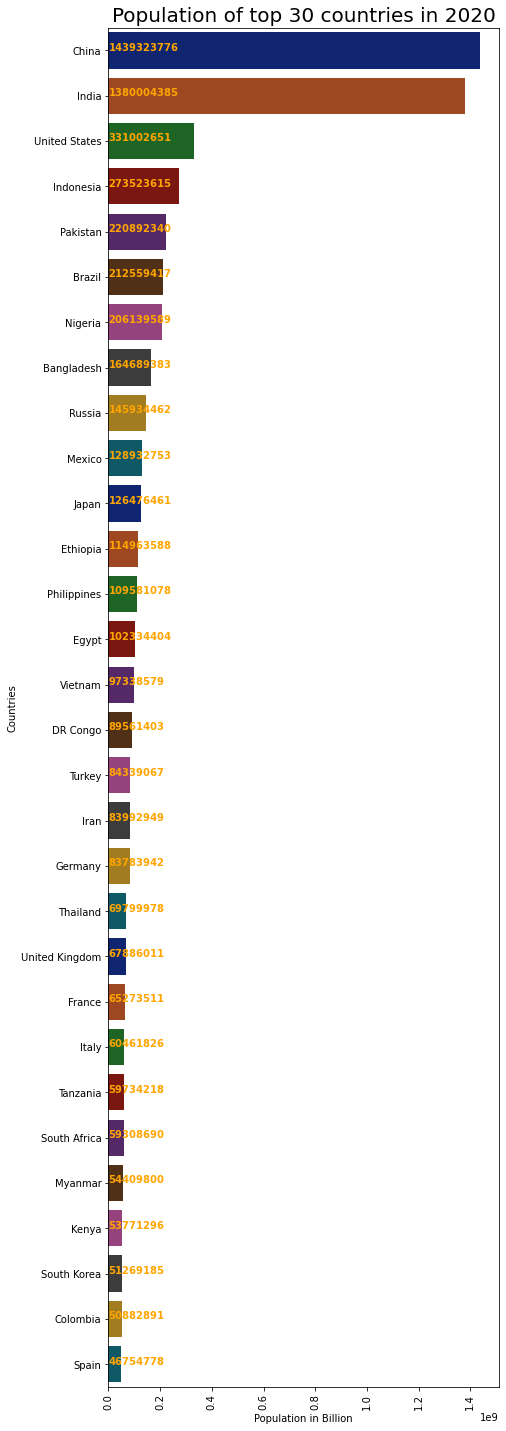

In [34]:
plt.rcParams['figure.figsize'] = (7, 25)  # figure size
ax = sns.barplot(x = populn['Population_2020'][:30], y = populn['Country'][:30], palette = 'dark') #  bar plot
for i,j in enumerate(populn['Population_2020'][:30]):
    ax.text(.5, i, j, weight="bold", color = 'orange', fontsize =10) #  use enumerate function to color to values 
ax.set_xlabel(xlabel = 'Population in Billion', fontsize = 10)  # x label
ax.set_ylabel(ylabel = 'Countries', fontsize = 10) # y label
ax.set_title(label = 'Population of top 30 countries in 2020', fontsize = 20) # title
plt.xticks(rotation = 90)
plt.show()

 largest population countries - China, India, USA , Indonesia, Pakistan

## Distribution of Population of Last 30 countries

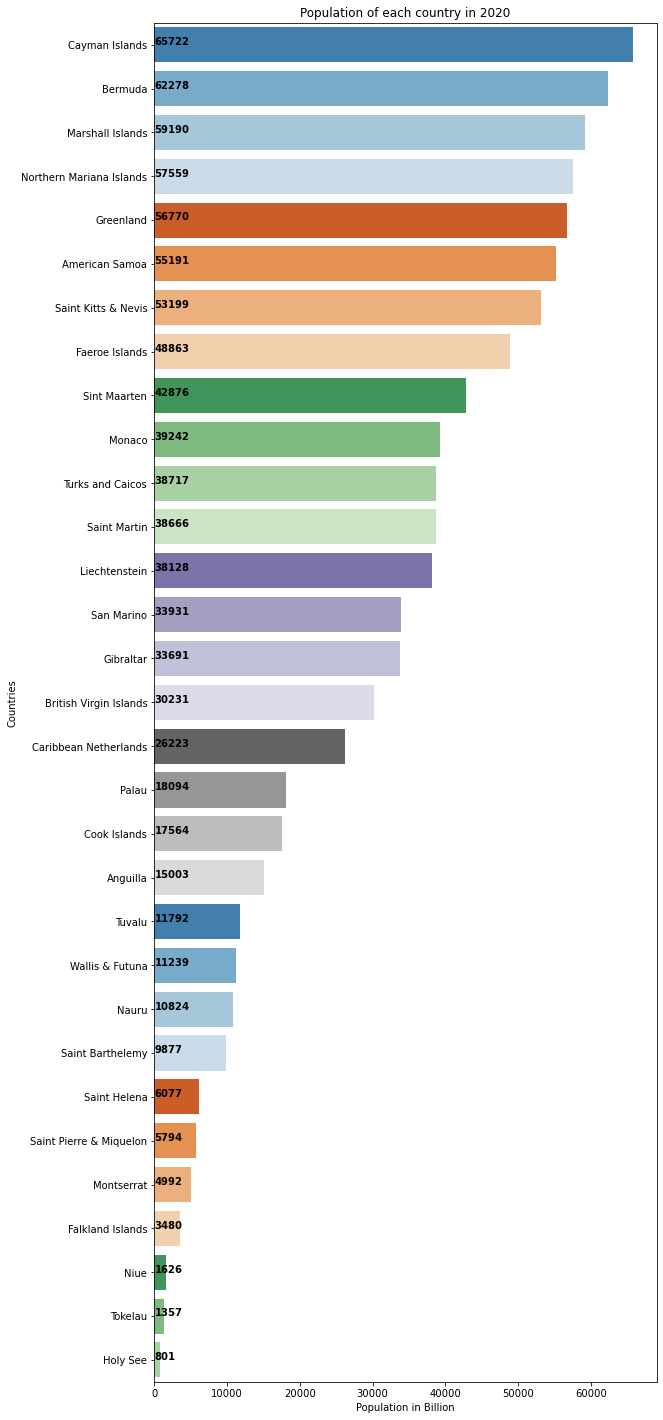

In [35]:
plt.figure(figsize=(9,25)) # figure size
ax = sns.barplot(x=populn['Population_2020'][-31:], y=populn['Country'][-31:], # bar plot
                 data=populn, palette="tab20c",
                 linewidth = 1)
for i,j in enumerate(populn['Population_2020'][-31:]): 
    ax.text(.5, i, j, weight="bold", color = 'black', fontsize =10)# use of enumerate function to color to values
plt.title("Population of each country in 2020")  # give title
ax.set_xlabel(xlabel = 'Population in Billion', fontsize = 10) # give x label
ax.set_ylabel(ylabel = 'Countries', fontsize = 10) # y label
plt.show()

Lowest populate countries - holy see , Tokelau, Falkland islands, Niue

## Distribution of Med_Age of Top 30 countries

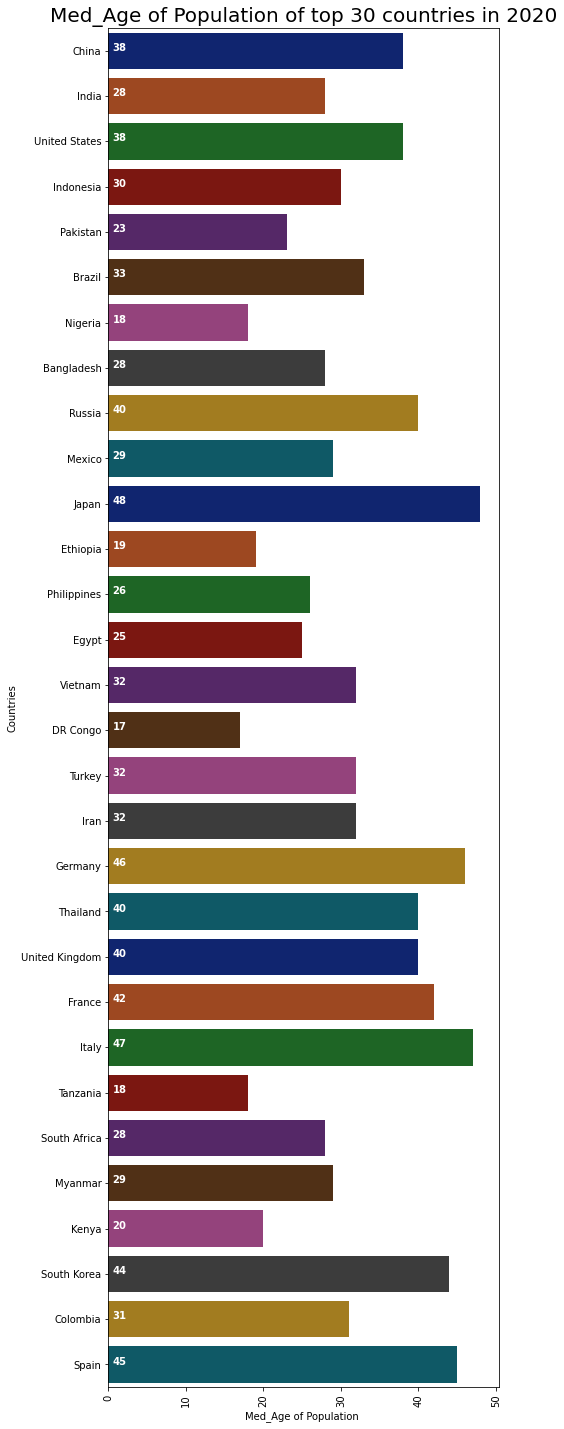

In [36]:
plt.rcParams['figure.figsize'] = (7, 25)  # figure size
ax = sns.barplot(x = populn['Med_Age'][:30], y = populn['Country'][:30], palette = 'dark') # bar plot
for i,j in enumerate(populn['Med_Age'][:30]):
    ax.text(.5, i, j, weight="bold", color = 'white', fontsize =10) # use of enuerate function to color to values
ax.set_xlabel(xlabel = 'Med_Age of Population ', fontsize = 10) # give x label
ax.set_ylabel(ylabel = 'Countries', fontsize = 10) # give y label
ax.set_title(label = 'Med_Age of Population of top 30 countries in 2020', fontsize = 20) # give title
plt.xticks(rotation = 90)
plt.show()

Med Age of countries Japan, Gemany and itly is highest

## Distribution of Urban Population of Top 30 countries in percentage

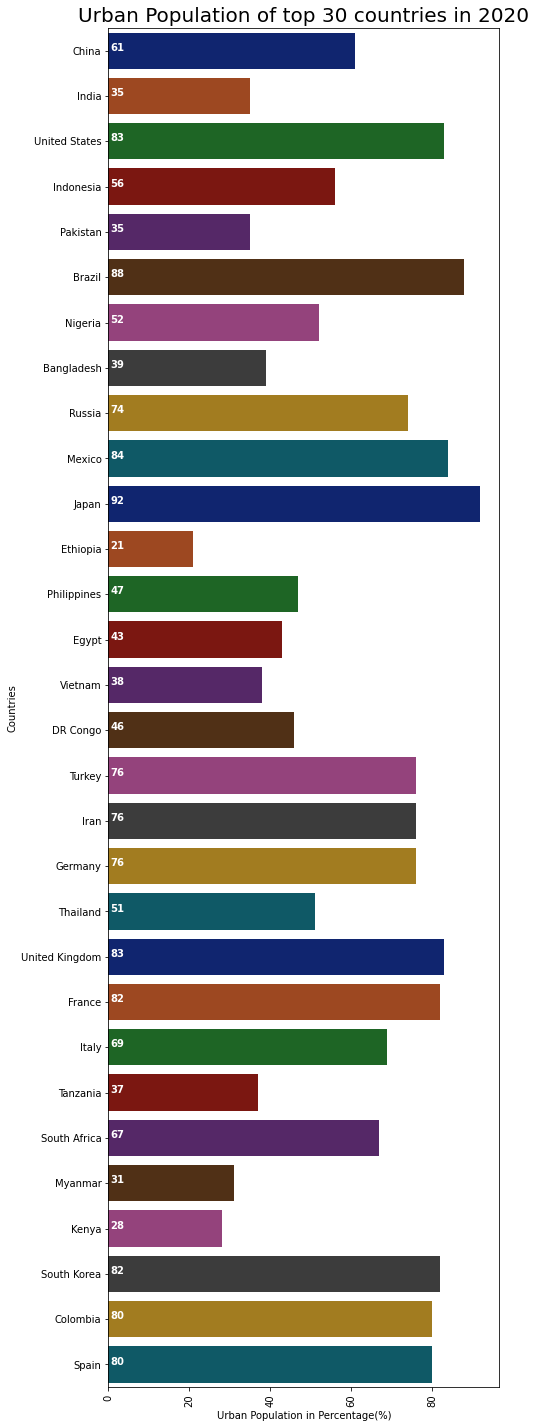

In [37]:
plt.rcParams['figure.figsize'] = (7, 25) # figure size
ax = sns.barplot(x = populn['Urban_Popln'][:30], y = populn['Country'][:30], palette = 'dark') # bar plot
for i,j in enumerate(populn['Urban_Popln'][:30]):
    ax.text(.5, i, j, weight="bold", color = 'white', fontsize =10) # use enumerate function to color to values
ax.set_xlabel(xlabel = 'Urban Population in Percentage(%)', fontsize = 10) # give x label
ax.set_ylabel(ylabel = 'Countries', fontsize = 10) # give y label
ax.set_title(label = 'Urban Population of top 30 countries in 2020', fontsize = 20) # give title
plt.xticks(rotation = 90)
plt.show()

Highest urban population in percent in Japan , Brazil, Mexico , USA, UK

## Distribution of Yearly Change in Population  of Top 30 countries in percentage

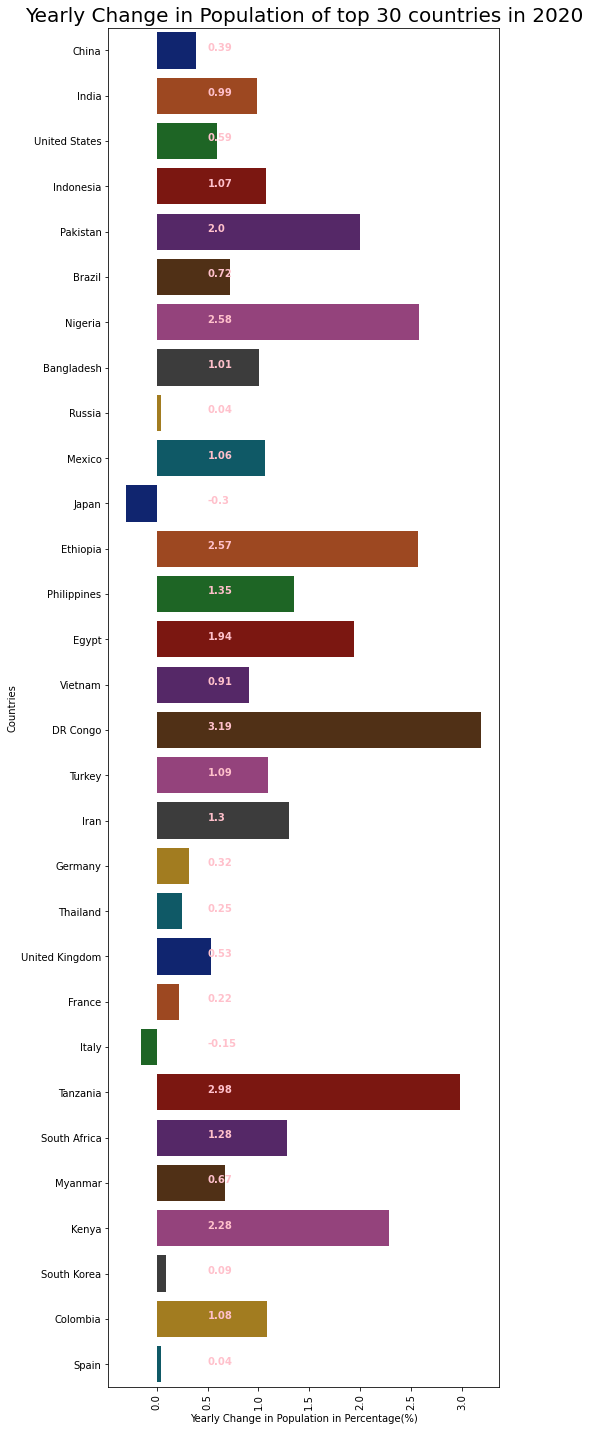

In [38]:
plt.rcParams['figure.figsize'] = (7, 25)# figure size
ax = sns.barplot(x = populn['Yearly_Change'][:30], y = populn['Country'][:30], palette = 'dark') # bar plot
for i,j in enumerate(populn['Yearly_Change'][:30]):
    ax.text(.5, i, j, weight="bold", color = 'pink', fontsize =10) # use of enumerate function to to color to values
ax.set_xlabel(xlabel = 'Yearly Change in Population in Percentage(%)', fontsize = 10) # x label 
ax.set_ylabel(ylabel = 'Countries', fontsize = 10) # y label 
ax.set_title(label = 'Yearly Change in Population of top 30 countries in 2020', fontsize = 20) # give title
plt.xticks(rotation = 90) 
plt.show()

Yearly change in population maximum in DR Congo, Tanzania , Nigeria , ethopia

## Distribution of Yearly Change in Population of Last 30 countries in percentage

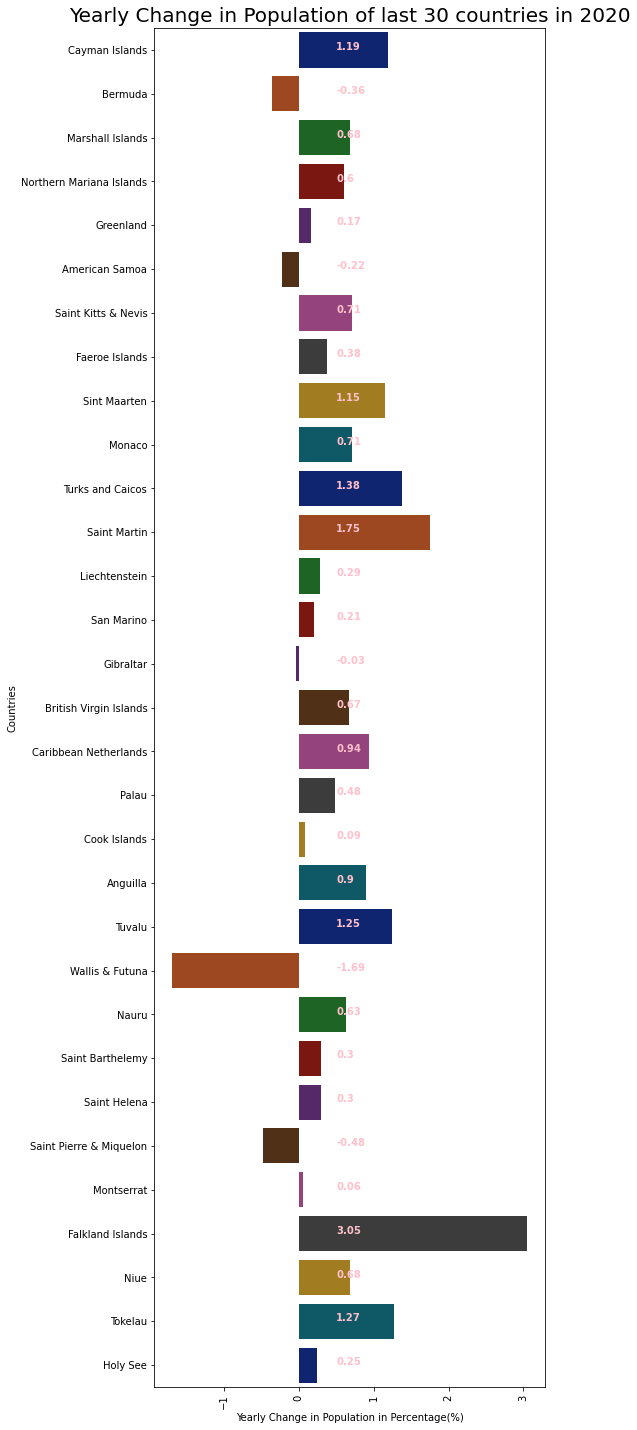

In [39]:
plt.rcParams['figure.figsize'] = (7, 25)  # figure size
ax = sns.barplot(x = populn['Yearly_Change'][-31:], y = populn['Country'][-31:], palette = 'dark') # bar plot
for i,j in enumerate(populn['Yearly_Change'][-31:]):
    ax.text(.5, i, j, weight="bold", color = 'pink', fontsize =10) # use of enumerate function to color to values
ax.set_xlabel(xlabel = 'Yearly Change in Population in Percentage(%)', fontsize = 10) # give x label
ax.set_ylabel(ylabel = 'Countries', fontsize = 10) # give y label
ax.set_title(label = 'Yearly Change in Population of last 30 countries in 2020', fontsize = 20) # give title
plt.xticks(rotation = 90)
plt.show()

Yearly change in population maximum in Falkisland and negative(-) in wallis & Futuna